In [112]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

from math import sqrt
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA

# KNN MODEL

In [113]:
#importing dataset
social=pd.read_csv("D:/Machine Learning Practical/Lab Exercises/LAB 7(PCA_KNN)/social.csv")
social

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [114]:
#Converting Male and Female to 0 and 1
social['Gender'] = social['Gender'].replace({'Male': 0, 'Female': 1})

In [115]:
X = social.iloc[:, [1, 2, 3]].values #Gender,Age and Estimated Salary
y = social.iloc[:, -1].values #Purchased or Not

In [116]:
#Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Standardizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<AxesSubplot:>

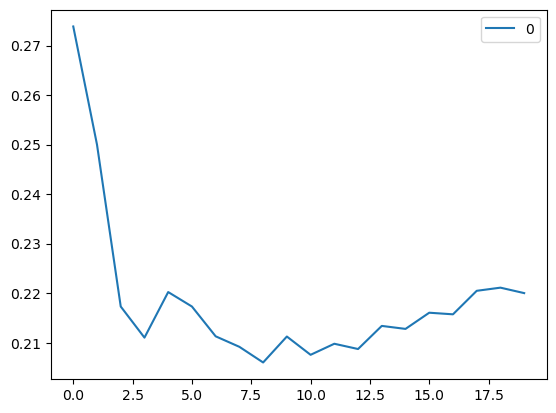

In [117]:
#Getting the best k value for the best model

#Plotting the RMSE for different k values
from sklearn import neighbors

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, p = 2) #P=2 GIVES US THE EUCLIDEAN DISTANCE

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)
    
#Plotting the curve
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [118]:
#Finding the best K values using Grid Search

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

#We see that for k=11 we have the least RMSE ,j=hence we use that for model fitting

{'n_neighbors': 11}

In [119]:
#Fitting the MODEL
best_model= KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
best_model.fit(X_train, y_train)

#Predicting
y_pred = best_model.predict(X_test)
y_pred

C:\Users\jesto\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [120]:
#Accuracy
cm1 = confusion_matrix(y_test, y_pred)
ac1 = accuracy_score(y_test,y_pred)
ac1
#The model is 95% accurate

0.95

# KNN WITH PCA

In [121]:
#X and Y
X= social.iloc[:, [1, 2, 3]].values #Gender,Age and Estimated Salary
y = social.iloc[:, -1].values #Purchased or Not

In [122]:
#Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20)

In [123]:
from sklearn.decomposition import PCA

#Trying to find the number of components after standardizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
#Applying PCA to find components
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [125]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.40010541, 0.31700691, 0.28288768])

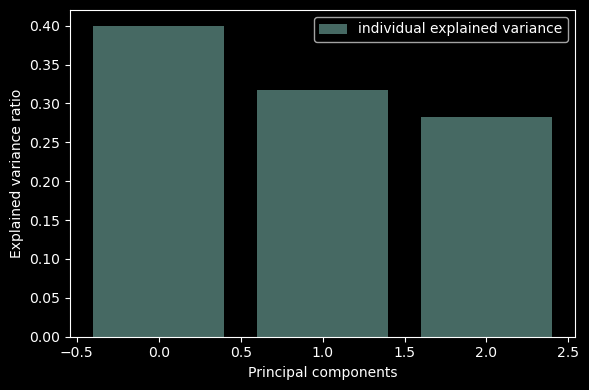

In [126]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(3), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### We see that the 1st Component is Responsible for 40% of the variance and the 2nd for 31.7 % and 3rd for 28.2%

## 1 PCA

In [127]:
#Lets first choose only 1 component which amount to 40% of the original Data
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [128]:
#Finding the best K values using Grid Search for KNN

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 11}

In [129]:
#Fitting the MODEL
best_model1= KNeighborsClassifier(n_neighbors = model.best_params_["n_neighbors"], p = 2)
best_model1.fit(X_train, y_train)

#Predicting
y_pred = best_model1.predict(X_test)
y_pred

C:\Users\jesto\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [130]:
#Accuracy
cm2 = confusion_matrix(y_test, y_pred)
ac2 = accuracy_score(y_test,y_pred)
ac2

#We see that Accuracy is 75.8% with only 1 Components


0.7583333333333333

## 2 PCA COMPONENTS

In [131]:
acc=[]

for i in list([1,2,3]):
       
         #X and Y
        X= social.iloc[:, [1, 2, 3]].values #Gender,Age and Estimated Salary
        y = social.iloc[:, -1].values #Purchased or Not
        
        #Training
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20)

        #Trying to find the number of components after standardizing
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        #Applying PCA to find components
        pca = PCA()
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
    
        #Lets first choose only 1 component which amount to 40% of the original Data
        pca = PCA(n_components=i)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

        #Finding the best K values using Grid Search for KNN

        from sklearn.model_selection import GridSearchCV
        params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11]}

        knn = neighbors.KNeighborsRegressor()

        model = GridSearchCV(knn, params, cv=5)
        model.fit(X_train,y_train)
        model.best_params_

        #Fitting the MODEL
        best_model1= KNeighborsClassifier(n_neighbors = model.best_params_["n_neighbors"], p = 2)
        best_model1.fit(X_train, y_train)

        #Predicting
        y_pred = best_model1.predict(X_test)

        #Accuracy
        cm = confusion_matrix(y_test, y_pred)
        ac = accuracy_score(y_test,y_pred)
        acc.append(ac)

#the accuracies for 1,2 and 3 components and purely KNN
acc.append(ac1)
acc

C:\Users\jesto\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jesto\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.7583333333333333, 0.8916666666666667, 0.9166666666666666, 0.95]

In [141]:

#Plotting 
df=pd.DataFrame(acc)
df1=df.rename(index={0: 'PCA1',1:'PCA2', 2:'PCA3',3:'KNN WITHOUT PCA'})
df1

,0
PCA1,0.758333
PCA2,0.891667
PCA3,0.916667
KNN WITHOUT PCA,0.950000


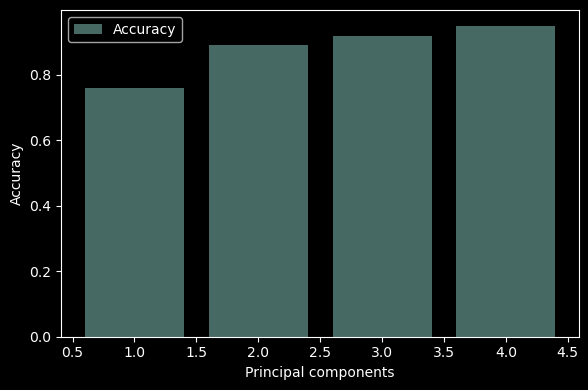

In [144]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(list([1,2,3,4]), acc, alpha=0.5, align='center',
            label='Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Conclusion: We see that with Just 1 component we get an accuracy of 75.1% while with 2 components we got 89.1% and 3 we got 91.6. Still we see that a better model was the KNN model with 95% accuracy though all features were used there.